
# The Task:



The State of Iowa Tax Board has requested an analysis of the 2015 liquor sales to predict the annual sales for 2016, in order to determine whether changes in the liquor tax rates are warranted. 

All assumptions and analysis are based on the dataset supplied by the state of Iowa. 

The data consisted of the full year of 2015 and the first 3 months of 2016. The data was engineered so that tets can be run based on the first 3 months of sales for 2015 and how that affects overall sales so that a similar prediction can be made for the full 2016 year.

After running 2 testing models and then running a different 3rd testing model, I have concluded that I can account for over 98% of the variance in the data for sales in 2015. This high score may be due to a high correlation between variables in the dataframe, however I tried to compensate by running the tests again with different variables, which produced very similar results. It is with this model that I predicted annual 2016 liquor sales and appended it to the 2015 dataframe to compare sales and see if there is indeed any increase to report to Iowa State Tax Board. I found that sales were predicted to go up.

In [199]:
import pandas as pd
from sklearn import datasets
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')



## Load the data into a DataFrame


# Load CSV using Pandas from URL


filepath = ('./iowa_liquor_sales_proj_2.csv')
df = pd.read_csv(filepath)

#data = pd.DataFrame(df.data,columns=df.feature_names)
print(df.shape)
print(df.keys())
df

## Transform the dates if needed, e.g.
#df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2709552, 24)
Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
5,S28869200001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,1,$53.34,1.75,0.46
6,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,...,238,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,6,$104.58,9.00,2.38
7,S28869500001,11/10/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,2,$106.68,3.50,0.92
8,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,...,173,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,4,$117.48,3.00,0.79
9,S29050900001,11/16/2015,4307,Crossroads Wine and Liquor,117 IOWA AVE,DUNLAP,712-2,"117 IOWA AVE\nDUNLAP 712-2\n(41.854728, -95.60...",43.0,Harrison,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [200]:
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [203]:
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$','')

In [204]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$','')

In [205]:
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$','')

In [206]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [210]:
df['Year']=df['Date'].dt.year

In [211]:
df['Month']=df['Date'].dt.month

In [212]:
df['Store_Number'] = df['Store Number'].astype(int)

In [213]:
df['Vendor_Number'] = df['Vendor Number'].astype(int)

In [214]:
df['Item_Number'] = df['Item Number'].astype(int)

In [215]:
df['Bottle_Volume'] = df['Bottle Volume (ml)'].astype(float)

In [216]:
df['State_Bottle_Cost'] = df['State Bottle Cost'].astype(float)

In [14]:
#df['State_Bottle_Cost'] = pd.to_numeric(df['State Bottle Cost'], downcast='float')


In [217]:
df['State_Bottle_Retail'] = df['State Bottle Retail'].astype(float)

In [218]:
df['Bottles_Sold'] = df['Bottles Sold'].astype(int)

In [219]:
df['Sale'] = df['Sale (Dollars)'].astype(float)

In [220]:
df['Zip_Code'] = pd.to_numeric(df['Zip Code'], errors='coerce')

In [221]:
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
Year                              int64


# EDA



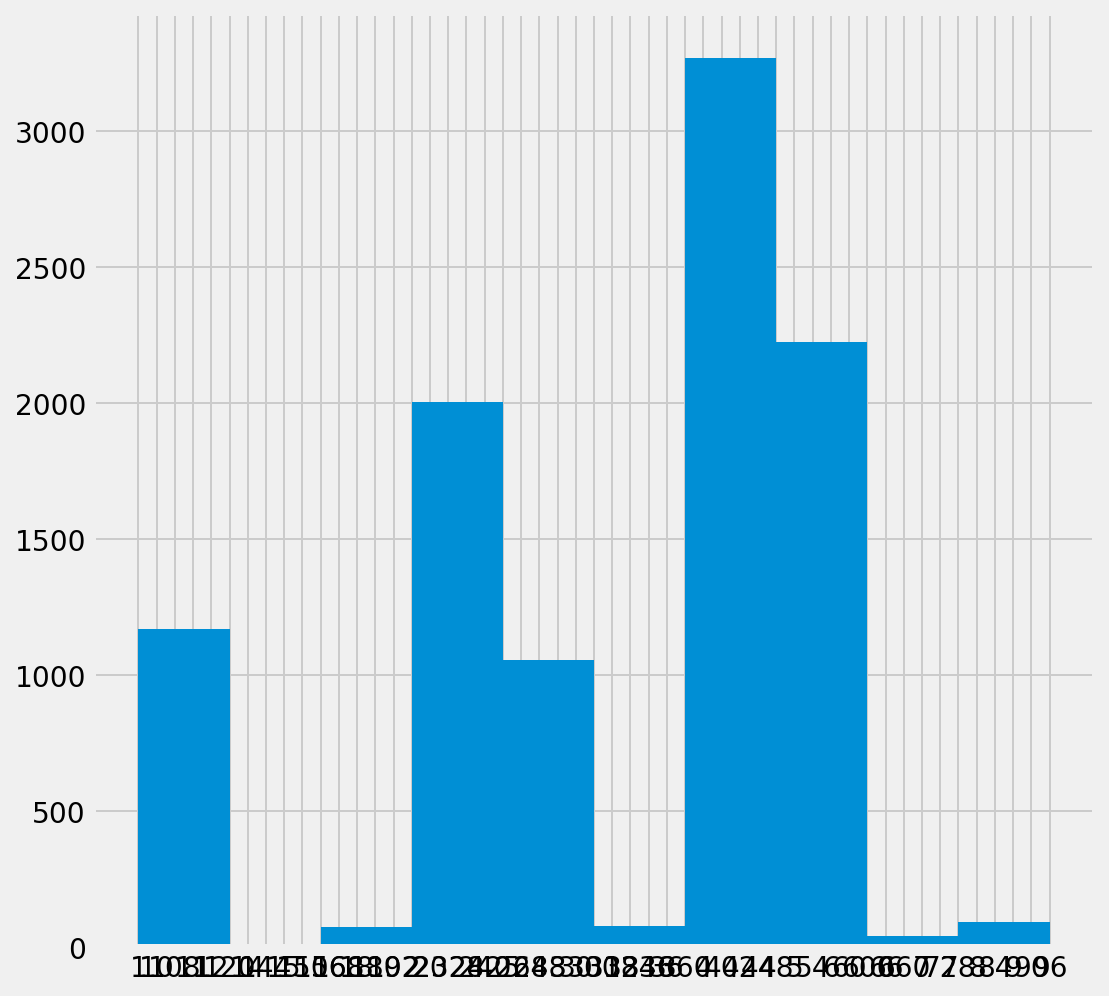

In [222]:
import matplotlib.pyplot as plt
x= df[['Bottles Sold']]
fig, ax = plt.subplots(figsize=(8,8))
plt.hist(x.loc[:10000,:])

plt.show()

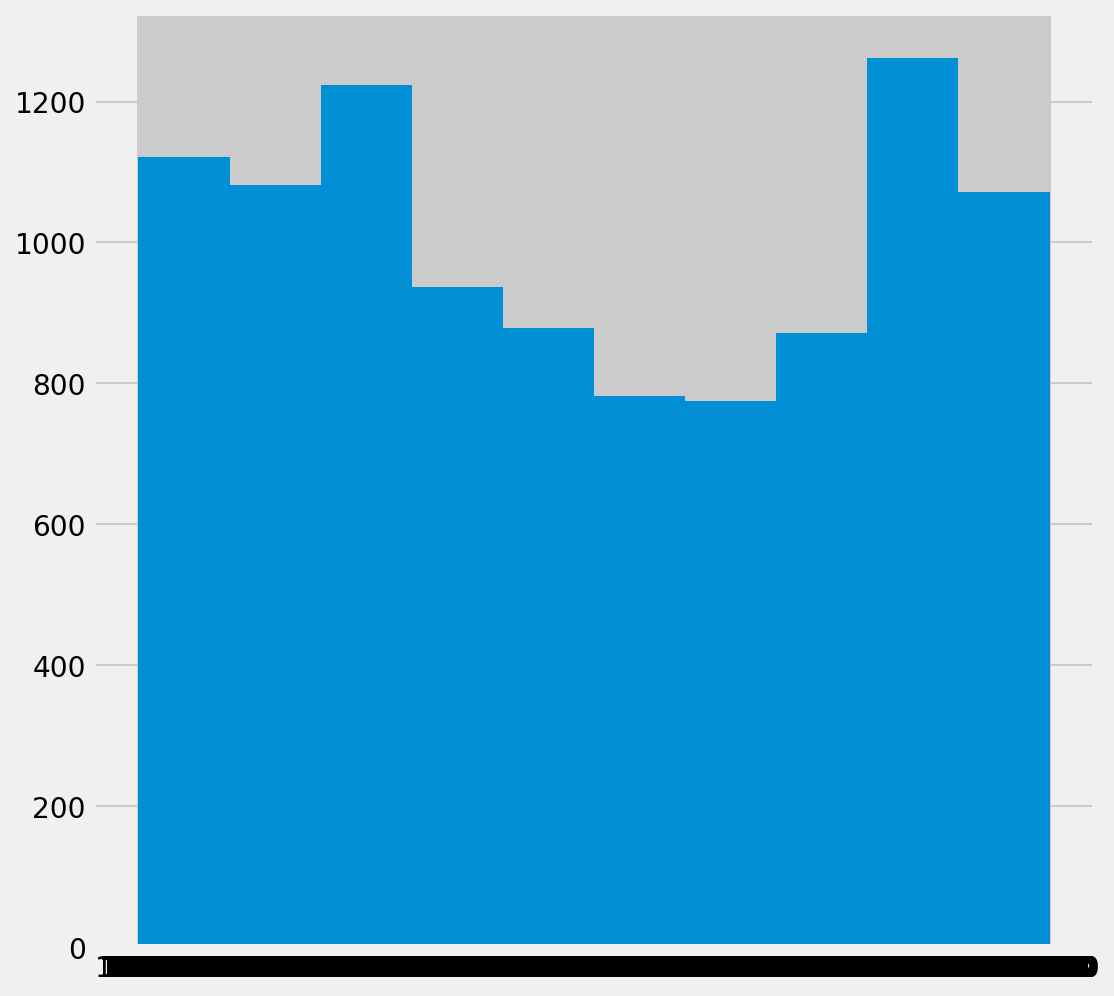

In [223]:
import matplotlib.pyplot as plt
x= df[['Sale (Dollars)']]
fig, ax = plt.subplots(figsize=(8,8))
plt.hist(x.loc[:10000,:])

plt.show()

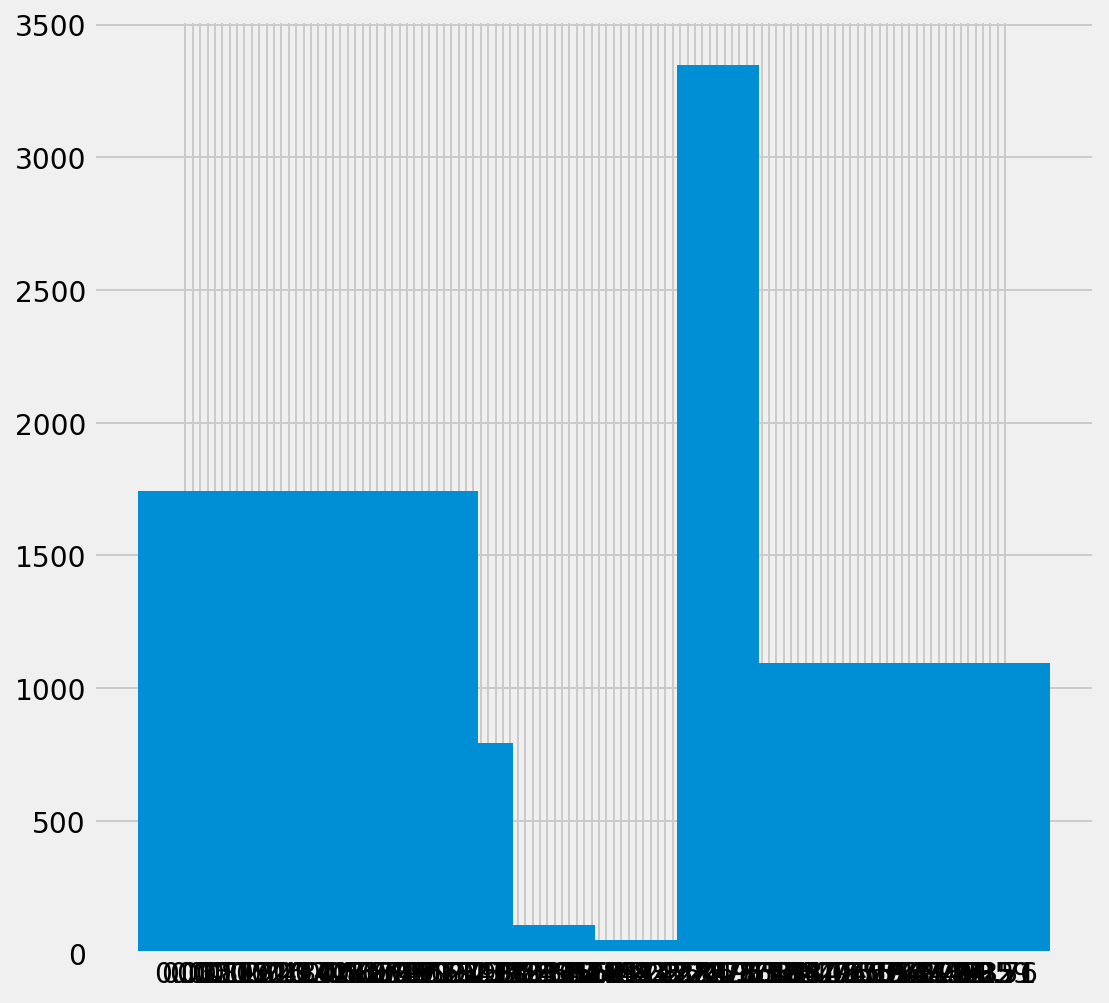

In [224]:
import matplotlib.pyplot as plt
x= df[['Volume Sold (Gallons)']]
fig, ax = plt.subplots(figsize=(8,8))
plt.hist(x.loc[:10000,:])

plt.show()

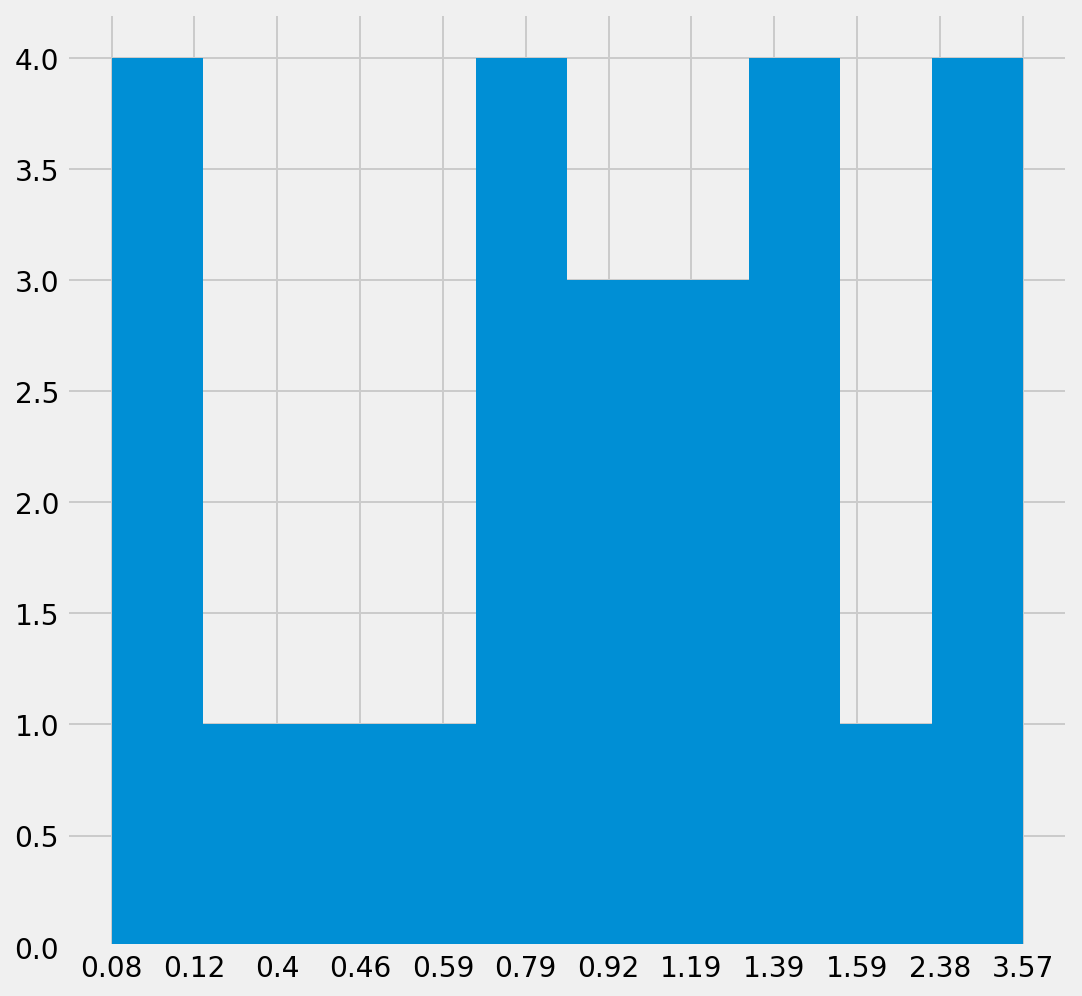

In [225]:
import matplotlib.pyplot as plt
x= df[['Volume Sold (Gallons)']]
fig, ax = plt.subplots(figsize=(8,8))
plt.hist(x.loc[:25,:])

plt.show()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Mining



In [226]:
df.groupby('City').sum().sort_values('Sale', ascending=False)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
City,,,,,,,,,,,,,,,,,,,,,
DES MOINES,868952982,18297895.0,2.478366e+11,61663941,12405329015,3140563,200851304,3456812,2737345.55,723268.840001,...,1367728,868952982,61663941,12405329015,200851304.0,2390173.07,3.588329e+06,3456812,4.443986e+07,1.196452e+10
CEDAR RAPIDS,637407493,10551726.0,1.940740e+11,47939578,8598599700,2488824,157678227,1914428,1677148.46,443109.460001,...,1090647,637407493,47939578,8598599700,157678227.0,1789750.10,2.687219e+06,1914428,2.448673e+07,9.753066e+09
DAVENPORT,409310747,9508802.0,1.216956e+11,29958350,5394246848,1594536,98355824,1532850,1157198.64,305757.360000,...,675412,409310747,29958350,5394246848,98355824.0,1067066.14,1.602215e+06,1532850,1.747656e+07,6.158730e+09
IOWA CITY,259665806,4178512.0,8.370079e+10,20621692,3910522645,989955,70532715,963948,841650.17,222360.520000,...,461704,259665806,20621692,3910522645,70532715.0,814878.81,1.223565e+06,963948,1.279549e+07,4.197901e+09
WATERLOO,305222100,591675.0,8.850820e+10,21731427,3948224576,1205400,69001243,1169700,822010.40,217196.600000,...,487965,305222100,21731427,3948224576,69001243.0,764977.11,1.148562e+06,1169700,1.256057e+07,4.293309e+09
WEST DES MOINES,232836400,5453443.0,7.481824e+10,18326691,3349141989,865201,64088226,761972,740992.30,195770.020000,...,424642,232836400,18326691,3349141989,64088226.0,756489.39,1.135848e+06,761972,1.235846e+07,3.608603e+09
SIOUX CITY,283659813,7680363.0,8.341733e+10,20468971,3603982716,990579,72539815,910798,796784.53,210524.610000,...,468650,283659813,20468971,3603982716,72539815.0,801321.81,1.203069e+06,910798,1.201932e+07,4.080970e+09
COUNCIL BLUFFS,295975175,6313164.0,8.445430e+10,20335153,3697582178,1092658,71787815,871597,770795.08,203651.120000,...,466975,295975175,20335153,3697582178,71787815.0,769002.38,1.154492e+06,871597,1.152233e+07,4.168457e+09
DUBUQUE,225864047,2112278.0,7.152862e+10,17101034,3050705446,797399,64614585,701327,667482.30,176348.530000,...,397332,225864047,17101034,3050705446,64614585.0,692184.47,1.039391e+06,701327,9.650613e+06,3.565012e+09


In [226]:
df.groupby('City').sum().sort_values('Sale', ascending=False)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
City,,,,,,,,,,,,,,,,,,,,,
DES MOINES,868952982,18297895.0,2.478366e+11,61663941,12405329015,3140563,200851304,3456812,2737345.55,723268.840001,...,1367728,868952982,61663941,12405329015,200851304.0,2390173.07,3.588329e+06,3456812,4.443986e+07,1.196452e+10
CEDAR RAPIDS,637407493,10551726.0,1.940740e+11,47939578,8598599700,2488824,157678227,1914428,1677148.46,443109.460001,...,1090647,637407493,47939578,8598599700,157678227.0,1789750.10,2.687219e+06,1914428,2.448673e+07,9.753066e+09
DAVENPORT,409310747,9508802.0,1.216956e+11,29958350,5394246848,1594536,98355824,1532850,1157198.64,305757.360000,...,675412,409310747,29958350,5394246848,98355824.0,1067066.14,1.602215e+06,1532850,1.747656e+07,6.158730e+09
IOWA CITY,259665806,4178512.0,8.370079e+10,20621692,3910522645,989955,70532715,963948,841650.17,222360.520000,...,461704,259665806,20621692,3910522645,70532715.0,814878.81,1.223565e+06,963948,1.279549e+07,4.197901e+09
WATERLOO,305222100,591675.0,8.850820e+10,21731427,3948224576,1205400,69001243,1169700,822010.40,217196.600000,...,487965,305222100,21731427,3948224576,69001243.0,764977.11,1.148562e+06,1169700,1.256057e+07,4.293309e+09
WEST DES MOINES,232836400,5453443.0,7.481824e+10,18326691,3349141989,865201,64088226,761972,740992.30,195770.020000,...,424642,232836400,18326691,3349141989,64088226.0,756489.39,1.135848e+06,761972,1.235846e+07,3.608603e+09
SIOUX CITY,283659813,7680363.0,8.341733e+10,20468971,3603982716,990579,72539815,910798,796784.53,210524.610000,...,468650,283659813,20468971,3603982716,72539815.0,801321.81,1.203069e+06,910798,1.201932e+07,4.080970e+09
COUNCIL BLUFFS,295975175,6313164.0,8.445430e+10,20335153,3697582178,1092658,71787815,871597,770795.08,203651.120000,...,466975,295975175,20335153,3697582178,71787815.0,769002.38,1.154492e+06,871597,1.152233e+07,4.168457e+09
DUBUQUE,225864047,2112278.0,7.152862e+10,17101034,3050705446,797399,64614585,701327,667482.30,176348.530000,...,397332,225864047,17101034,3050705446,64614585.0,692184.47,1.039391e+06,701327,9.650613e+06,3.565012e+09


In [226]:
df.groupby('City').sum().sort_values('Sale', ascending=False)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
City,,,,,,,,,,,,,,,,,,,,,
DES MOINES,868952982,18297895.0,2.478366e+11,61663941,12405329015,3140563,200851304,3456812,2737345.55,723268.840001,...,1367728,868952982,61663941,12405329015,200851304.0,2390173.07,3.588329e+06,3456812,4.443986e+07,1.196452e+10
CEDAR RAPIDS,637407493,10551726.0,1.940740e+11,47939578,8598599700,2488824,157678227,1914428,1677148.46,443109.460001,...,1090647,637407493,47939578,8598599700,157678227.0,1789750.10,2.687219e+06,1914428,2.448673e+07,9.753066e+09
DAVENPORT,409310747,9508802.0,1.216956e+11,29958350,5394246848,1594536,98355824,1532850,1157198.64,305757.360000,...,675412,409310747,29958350,5394246848,98355824.0,1067066.14,1.602215e+06,1532850,1.747656e+07,6.158730e+09
IOWA CITY,259665806,4178512.0,8.370079e+10,20621692,3910522645,989955,70532715,963948,841650.17,222360.520000,...,461704,259665806,20621692,3910522645,70532715.0,814878.81,1.223565e+06,963948,1.279549e+07,4.197901e+09
WATERLOO,305222100,591675.0,8.850820e+10,21731427,3948224576,1205400,69001243,1169700,822010.40,217196.600000,...,487965,305222100,21731427,3948224576,69001243.0,764977.11,1.148562e+06,1169700,1.256057e+07,4.293309e+09
WEST DES MOINES,232836400,5453443.0,7.481824e+10,18326691,3349141989,865201,64088226,761972,740992.30,195770.020000,...,424642,232836400,18326691,3349141989,64088226.0,756489.39,1.135848e+06,761972,1.235846e+07,3.608603e+09
SIOUX CITY,283659813,7680363.0,8.341733e+10,20468971,3603982716,990579,72539815,910798,796784.53,210524.610000,...,468650,283659813,20468971,3603982716,72539815.0,801321.81,1.203069e+06,910798,1.201932e+07,4.080970e+09
COUNCIL BLUFFS,295975175,6313164.0,8.445430e+10,20335153,3697582178,1092658,71787815,871597,770795.08,203651.120000,...,466975,295975175,20335153,3697582178,71787815.0,769002.38,1.154492e+06,871597,1.152233e+07,4.168457e+09
DUBUQUE,225864047,2112278.0,7.152862e+10,17101034,3050705446,797399,64614585,701327,667482.30,176348.530000,...,397332,225864047,17101034,3050705446,64614585.0,692184.47,1.039391e+06,701327,9.650613e+06,3.565012e+09


In [369]:
df.groupby('County').mean().sort_values('Sale', ascending=False)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
County,,,,,,,,,,,,,,,,,,,,,
Dallas,3516.860910,25.0,1.043907e+06,257.465971,46417.163918,11.407390,942.047857,13.770228,14.319193,3.782568,...,5.911779,3516.860910,257.465971,46417.163918,942.047857,10.086326,15.148395,13.770228,243.191052,50220.707129
Johnson,3456.626391,52.0,1.042409e+06,256.630089,49948.375252,12.080160,894.367849,11.407403,10.174843,2.688184,...,5.817726,3456.626391,256.630089,49948.375252,894.367849,10.436902,15.670890,11.407403,161.071004,52252.129693
Polk,3574.389356,77.0,1.042139e+06,256.786047,48455.861129,12.643822,881.712790,11.826492,10.183208,2.690594,...,5.813899,3574.389356,256.786047,48455.861129,881.712790,10.216061,15.339128,11.826492,159.515047,50249.196675
Carroll,3319.272978,14.0,1.043164e+06,250.379118,42441.514309,11.323343,1009.362997,10.589884,11.517219,3.042522,...,5.863078,3319.272978,250.379118,42441.514309,1009.362997,9.929890,14.912195,10.589884,155.219949,51332.226887
Delaware,4683.158511,28.0,1.043323e+06,254.743212,43957.494693,10.607581,1037.825637,10.894004,11.454229,3.026229,...,6.011027,4683.158511,254.743212,43957.494693,1037.825637,9.975314,14.980590,10.894004,149.845406,52076.358374
Scott,3633.280157,82.0,1.043660e+06,256.517674,46033.009166,13.045822,863.436629,12.214212,9.686884,2.559447,...,5.790099,3633.280157,256.517674,46033.009166,863.436629,9.624638,14.450823,12.214212,149.449703,52766.940474
Floyd,3681.560380,34.0,1.048835e+06,259.050917,46701.206840,11.250552,979.405130,11.394947,10.896632,2.878658,...,5.751561,3681.560380,259.050917,46701.206840,979.405130,9.604136,14.424217,11.394947,147.524519,50588.797867
Woodbury,3610.549841,97.0,1.044582e+06,256.108365,44762.080454,12.449104,907.409569,11.005332,9.632151,2.544942,...,5.898888,3610.549841,256.108365,44762.080454,907.409569,9.968118,14.966124,11.005332,144.649045,51100.314222
Sioux,3878.556120,84.0,1.047041e+06,256.901155,44265.517321,10.437259,1043.652810,9.496921,10.615156,2.804090,...,5.863510,3878.556120,256.901155,44265.517321,1043.652810,9.908660,14.881450,9.496921,141.233329,51168.080908


In [381]:
df.Sale.sum()

349854916.2888579

In [228]:
df_2015 = df[df['Year']==2015]

In [229]:
df_2015.dropna(inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
df_2015 

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
6,S28865700001,2015-11-09,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,...,11,2538,962,238,1500.0,11.62,17.43,6,104.58,50702.0
8,S29339300091,2015-11-30,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,...,11,2662,65,173,750.0,19.58,29.37,4,117.48,52761.0
13,S28866900001,2015-11-11,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,...,11,3650,962,238,1500.0,11.62,17.43,1,17.43,51025.0
18,S29134300126,2015-11-18,3723,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",67.0,Monona,...,11,3723,305,258,6000.0,99.00,148.50,1,148.50,51040.0
21,S29282800048,2015-11-23,2642,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",63.0,Marion,...,11,2642,962,238,1500.0,11.62,17.43,6,104.58,50219.0
25,S28867000001,2015-11-04,3842,Bancroft Liquor Store,107 N PORTLAND ST PO BX 222,BANCROFT,50517,107 N PORTLAND ST PO BX 222\nBANCROFT 50517\n(...,55.0,Kossuth,...,11,3842,962,238,1500.0,11.62,17.43,3,52.29,50517.0
29,S28865800001,2015-11-09,2539,Hy-Vee Food Store / iowa Falls,HIGHWAY 65 SOUTH,IOWA FALLS,50126,HIGHWAY 65 SOUTH\nIOWA FALLS 50126\n,42.0,Hardin,...,11,2539,962,238,1500.0,11.62,17.43,6,104.58,50126.0
38,S28867100001,2015-11-09,4604,Pit Stop Liquors / Newton,"1324, 1st AVE E",NEWTON,50208,"1324, 1st AVE E\nNEWTON 50208\n(41.699173, -93...",50.0,Jasper,...,11,4604,962,238,1500.0,11.62,17.43,2,34.86,50208.0
42,S29191200001,2015-11-19,2248,Ingersoll Liquor and Beverage,3500 INGERSOLL AVE,DES MOINES,50312,3500 INGERSOLL AVE\nDES MOINES 50312\n(41.5863...,77.0,Polk,...,11,2248,65,173,750.0,19.58,29.37,36,1057.32,50312.0
50,S29137200001,2015-11-18,2566,Hy-Vee Food Store / Knoxville,813 N LINCOLN STE 1,KNOXVILLE,50138,813 N LINCOLN STE 1\nKNOXVILLE 50138\n(41.3254...,63.0,Marion,...,11,2566,962,238,1500.0,11.62,17.43,12,209.16,50138.0


In [382]:
df_2015.groupby('Month').sum().sort_values('Sale', ascending=False)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Year,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
Month,,,,,,,,,,,,,,,,,,,,
12,826848560,13183023.0,2.418978e+11,59235464,10484620269,2798871,209916579,2252618,1974776.38,521741.210001,464092785,826848560,59235464,10484620269,209916579.0,2.357671e+06,3.541754e+06,2252618,3.060091e+07,1.180034e+10
6,732442041,11694460.0,2.134913e+11,52353445,9478512506,2507117,191026475,2055507,1881166.71,496989.130001,412819095,732442041,52353445,9478512506,191026475.0,2.000531e+06,3.006027e+06,2055507,2.704752e+07,1.050601e+10
10,627776166,9944236.0,1.828737e+11,44386120,8007495183,2150205,160343025,1920409,1769625.26,467528.510001,350245285,627776166,44386120,8007495183,160343025.0,1.740732e+06,2.616199e+06,1920409,2.584127e+07,8.907209e+09
9,681760349,10889880.0,1.973626e+11,48572943,8736030434,2332135,175553342,1838232,1677914.70,443298.100001,381393155,681760349,48572943,8736030434,175553342.0,1.843857e+06,2.766617e+06,1838232,2.408023e+07,9.701252e+09
11,630659979,10113331.0,1.842270e+11,45166851,8129438739,2158335,161102811,1769176,1572508.70,415455.440000,354063710,630659979,45166851,8129438739,161102811.0,1.752615e+06,2.630228e+06,1769176,2.360886e+07,9.012033e+09
3,634666044,10238065.0,1.863391e+11,45835748,8094228501,2197764,165222525,1750252,1577854.59,416860.100001,360441185,634666044,45835748,8094228501,165222525.0,1.733993e+06,2.604325e+06,1750252,2.322945e+07,9.173228e+09
4,643148795,10398804.0,1.879366e+11,45892972,8321734666,2215060,167269325,1760836,1596418.95,421763.090001,363687350,643148795,45892972,8321734666,167269325.0,1.750363e+06,2.628124e+06,1760836,2.283082e+07,9.251042e+09
5,604337759,9637826.0,1.762641e+11,43141607,7731041005,2060030,158299300,1682216,1600964.43,422961.110000,341191890,604337759,43141607,7731041005,158299300.0,1.662807e+06,2.497708e+06,1682216,2.240761e+07,8.680486e+09
7,655869921,10293358.0,1.899023e+11,46706527,8396725107,2240740,169286843,1727707,1569249.82,414584.310001,367084640,655869921,46706527,8396725107,169286843.0,1.758291e+06,2.640382e+06,1727707,2.237451e+07,9.335428e+09


In [231]:
df_2015_year = df_2015[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Store_Number', 'Bottles_Sold','Sale']] 

In [232]:
df_2015_group = df_2015_year.groupby('Store_Number').sum()

In [233]:
df_2015_f3m = df_2015[df_2015['Month']<4]

In [234]:
df_2015_f3m_clean = df_2015_f3m[[ 'Store_Number', 'Sale']] 

In [235]:
df_2015_f3m_group = df_2015_f3m_clean.groupby('Store_Number').sum() 

In [236]:
df_2015_f3m_group.rename(columns={'Sale': 'Sale_f3m'}, inplace=True)

In [ ]:
# df_2015_f3m_group['Store_Number'] = df_2015_f3m_group['Store_Number'].astype(int)

In [237]:
df_2015_f3m_group.head()

,Sale_f3m
Store_Number,
2106,337166.53
2113,22351.86
2130,277764.46
2152,16805.11
2178,54411.42


In [238]:
df_2015_group.join(df_2015_f3m_group).head()

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42


In [239]:
#run only once 
#df_2015_group = df_2015_group.join(df_2015_f3m_group)

In [240]:
df_2015_group.dropna()

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42
2190,152643.66,229161.33,10382625.0,107479,1226205.17,255392.25
2191,63279.89,94971.07,5419875.0,79006,1275405.26,318985.32
2200,45107.16,67728.01,4384000.0,15409,223899.24,45340.33
2205,29443.78,44214.11,2540650.0,17863,230898.31,57849.23


In [241]:
df_2015_group.describe()

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
count,1374.000000,1374.000000,1.374000e+03,1374.000000,1.374000e+03,1.281000e+03
mean,15561.848421,23370.806223,1.467265e+06,15679.498544,2.065331e+05,4.910286e+04
std,24267.788336,36441.059401,2.066206e+06,31490.477656,5.020404e+05,1.206400e+05
min,12.670000,19.010000,7.500000e+02,103.000000,6.799800e+02,4.138500e+02
25%,2601.590000,3909.985000,2.597750e+05,3046.000000,3.083463e+04,8.335470e+03
50%,6995.670000,10504.170000,7.141500e+05,6576.000000,7.122926e+04,1.805408e+04
75%,16087.250000,24167.035000,1.619512e+06,15909.250000,1.917841e+05,4.671076e+04
max,236754.110000,355414.460000,1.784085e+07,593628.000000,9.790022e+06,2.328836e+06


In [242]:
df_2016 = df[df['Year']==2016]
df_2016.dropna(inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [243]:
df_2016

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Month,Store_Number,Vendor_Number,Item_Number,Bottle_Volume,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale,Zip_Code
2184243,S30383800018,2016-01-26,3621,"Jensen Liquors, Ltd.",615 2ND AVE,SHELDON,51201,"615 2ND AVE\nSHELDON 51201\n(43.18463, -95.854...",71.0,O'Brien,...,1,3621,497,1224,750.0,21.50,32.25,1,32.25,51201.0
2184484,S30165000183,2016-01-12,2552,Hy-Vee Food Store #3 / Cedar Rapids,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404,20 WILSON AVENUE WEST\nCEDAR RAPIDS 52404\n(41...,57.0,Linn,...,1,2552,65,173,750.0,19.58,29.37,2,58.74,52404.0
2184485,S30172700001,2016-01-13,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,1,2513,65,173,750.0,19.58,29.37,12,352.44,52240.0
2184486,S30188900079,2016-01-13,3869,Bootleggin' Barzini's Fin,412 1ST AVE,CORALVILLE,52241,"412 1ST AVE\nCORALVILLE 52241\n(41.672672, -91...",52.0,Johnson,...,1,3869,65,173,750.0,19.58,29.37,3,88.11,52241.0
2184487,S30193900075,2016-01-14,2106,Hillstreet News and Tobacco,2217 COLLEGE,CEDAR FALLS,50613,"2217 COLLEGE\nCEDAR FALLS 50613\n(42.517607, -...",7.0,Black Hawk,...,1,2106,65,173,750.0,19.58,29.37,1,29.37,50613.0
2184488,S30441600009,2016-01-28,2248,Ingersoll Liquor and Beverage,3500 INGERSOLL AVE,DES MOINES,50312,3500 INGERSOLL AVE\nDES MOINES 50312\n(41.5863...,77.0,Polk,...,1,2248,65,173,750.0,19.58,29.37,36,1057.32,50312.0
2184489,S30032900145,2016-01-05,2651,Hy-Vee / Waverly,1311 4 STREET SW,WAVERLY,50677,"1311 4 STREET SW\nWAVERLY 50677\n(42.713533, -...",9.0,Bremer,...,1,2651,65,173,750.0,19.58,29.37,1,29.37,50677.0
2184490,S30039900002,2016-01-06,2285,John's Grocery,401 EAST MARKET ST,IOWA CITY,52240,401 EAST MARKET ST\nIOWA CITY 52240\n(41.66354...,52.0,Johnson,...,1,2285,65,173,750.0,19.58,29.37,24,704.88,52240.0
2184491,S30053000037,2016-01-06,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 DEVILS GLEN ROAD,BETTENDORF,52722,2890 DEVILS GLEN ROAD\nBETTENDORF 52722\n(41.5...,82.0,Scott,...,1,2603,65,173,750.0,19.58,29.37,12,352.44,52722.0
2184492,S30000200003,2016-01-04,2643,Hy-Vee Wine and Spirits / Waterloo,2126 KIMBALL AVE,WATERLOO,50701,2126 KIMBALL AVE\nWATERLOO 50701\n,7.0,Black Hawk,...,1,2643,65,173,750.0,19.58,29.37,12,352.44,50701.0


In [244]:
df_2016_3m = df_2016[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Store_Number', 'Bottles_Sold','Sale']] 

In [245]:
df_2016_f3m = df[df['Month']<4]

In [246]:
df_2016_f3m_clean = df_2016_f3m[[ 'Store_Number', 'Sale']] 

In [247]:
df_2016_f3m_group = df_2016_f3m_clean.groupby('Store_Number').sum()

In [248]:
df_2016_f3m_group.rename(columns={'Sale': 'Sale_f3m'}, inplace=True)

In [249]:
df_2016_group = df_2016_3m.groupby('Store_Number').sum()

In [260]:
df_2016_group.dropna(inplace=True)
df_2016_group

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale
Store_Number,,,,,
2106,12850.99,19282.87,1125075.0,23579,337446.81
2113,4132.16,6201.13,369000.0,1701,21663.33
2130,10399.76,15603.80,969925.0,19730,303978.69
2152,2053.31,3085.95,229500.0,749,9307.75
2178,6156.75,9243.32,617275.0,4525,58749.04
2190,39487.76,59250.94,2512300.0,24528,320989.41
2191,16765.65,25156.47,1439725.0,18680,300110.12
2200,10802.71,16212.11,1060625.0,3877,55121.79
2228,6693.58,10047.29,636375.0,3676,42359.79


In [251]:
df_2016_group.join(df_2016_f3m_group)

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,12850.99,19282.87,1125075.0,23579,337446.81,674970.58
2113,4132.16,6201.13,369000.0,1701,21663.33,44088.49
2130,10399.76,15603.80,969925.0,19730,303978.69,584706.73
2152,2053.31,3085.95,229500.0,749,9307.75,30557.35
2178,6156.75,9243.32,617275.0,4525,58749.04,113351.32
2190,39487.76,59250.94,2512300.0,24528,320989.41,588918.84
2191,16765.65,25156.47,1439725.0,18680,300110.12,621613.57
2200,10802.71,16212.11,1060625.0,3877,55121.79,100655.56
2228,6693.58,10047.29,636375.0,3676,42359.79,93429.61


In [285]:
# run only once!!
#df_2016_group = df_2016_group.join(df_2016_f3m_group)

In [286]:
df_2016_group

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,12850.99,19282.87,1125075.0,23579,337446.81,674970.58
2113,4132.16,6201.13,369000.0,1701,21663.33,44088.49
2130,10399.76,15603.80,969925.0,19730,303978.69,584706.73
2152,2053.31,3085.95,229500.0,749,9307.75,30557.35
2178,6156.75,9243.32,617275.0,4525,58749.04,113351.32
2190,39487.76,59250.94,2512300.0,24528,320989.41,588918.84
2191,16765.65,25156.47,1439725.0,18680,300110.12,621613.57
2200,10802.71,16212.11,1060625.0,3877,55121.79,100655.56
2228,6693.58,10047.29,636375.0,3676,42359.79,93429.61


In [287]:
df_2015_group.dropna()

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42
2190,152643.66,229161.33,10382625.0,107479,1226205.17,255392.25
2191,63279.89,94971.07,5419875.0,79006,1275405.26,318985.32
2200,45107.16,67728.01,4384000.0,15409,223899.24,45340.33
2205,29443.78,44214.11,2540650.0,17863,230898.31,57849.23


In [288]:
#run only once
#df_2015_group = df_2015_group.dropna()

In [289]:
mask = df_2016_group.index.isin(df_2015_group.index)
# run once
#df_2016_group = df_2016_group[mask]

In [273]:
len(mask)

1290

In [274]:
mask.sum()

1199

In [290]:
df_2016_group

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,12850.99,19282.87,1125075.0,23579,337446.81,674970.58
2113,4132.16,6201.13,369000.0,1701,21663.33,44088.49
2130,10399.76,15603.80,969925.0,19730,303978.69,584706.73
2152,2053.31,3085.95,229500.0,749,9307.75,30557.35
2178,6156.75,9243.32,617275.0,4525,58749.04,113351.32
2190,39487.76,59250.94,2512300.0,24528,320989.41,588918.84
2191,16765.65,25156.47,1439725.0,18680,300110.12,621613.57
2200,10802.71,16212.11,1060625.0,3877,55121.79,100655.56
2228,6693.58,10047.29,636375.0,3676,42359.79,93429.61


# Statistical Relationships



Many of the variables are highly correlated as seen in the heatmap graph in the plotting section, therefor producing a very high R-Score >98%. The R scores in statsmodel results indicated to take out a number of variables but the score remained quite high even when running on 2 different models. Additionally a number of stores particularly in the 3 largest cities in Iowa account for a large portion of annual revenue and heavily skewing the sales data by store to the right.

# Linear Regression Model




In [291]:
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


%matplotlib inline 
import numpy as np
import pandas as pd

In [292]:
df_2015_group.dropna(inplace=True)

df_2015_group

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m
Store_Number,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42
2190,152643.66,229161.33,10382625.0,107479,1226205.17,255392.25
2191,63279.89,94971.07,5419875.0,79006,1275405.26,318985.32
2200,45107.16,67728.01,4384000.0,15409,223899.24,45340.33
2205,29443.78,44214.11,2540650.0,17863,230898.31,57849.23


In [294]:
X1 = df_2015_group[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Bottles_Sold', 'Sale_f3m']]
y1 = df_2015_group['Sale']  


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=77777)

In [296]:
slr = LinearRegression()

In [297]:
cross_val_score(slr,X_train,y_train)

array([ 0.98245111,  0.9720755 ,  0.98688283])

In [298]:
print(np.mean(cross_val_score(slr,X1,y1)))
print(np.std(cross_val_score(slr,X1,y1)))

0.977753713501
0.0145304466686


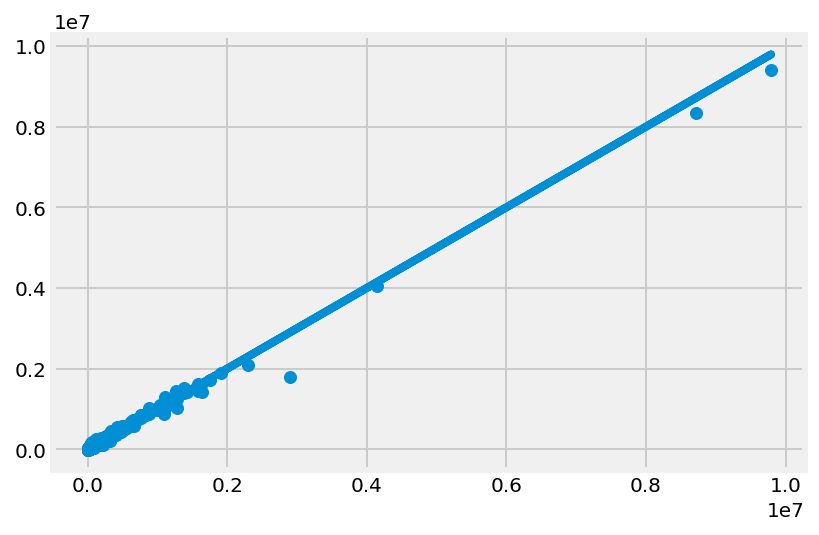

0.99046596842122359

In [299]:
slr.fit(X_train,y_train)
predictions = slr.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.show()
slr.score(X_test,y_test)

In [300]:
slr.fit(X1,y1)
predictions_2016 = slr.predict(df_2016_group[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Bottles_Sold', 'Sale_f3m']])
predictions_2016

array([  1.84512900e+06,   1.08255072e+05,   1.59013172e+06, ...,
         8.24373304e+03,  -5.60406575e+02,   4.60615409e+03])

In [301]:
len(predictions_2016)

1199

In [304]:
df_pred_2016_sales = pd.DataFrame(predictions_2016, columns=['Predicted 2016'])
df1 = df_2016_group.reset_index()
df2 = df_pred_2016_sales.reset_index(drop=True)
result = pd.concat( [df1, df2], axis=1) 
result= result.set_index('Store_Number')
result= result[['Predicted 2016']]

df_2015_group.join(result)

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m,Predicted 2016
Store_Number,,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53,1.845129e+06
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86,1.082551e+05
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46,1.590132e+06
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11,6.993927e+04
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42,3.012815e+05
2190,152643.66,229161.33,10382625.0,107479,1226205.17,255392.25,1.648961e+06
2191,63279.89,94971.07,5419875.0,79006,1275405.26,318985.32,1.677019e+06
2200,45107.16,67728.01,4384000.0,15409,223899.24,45340.33,2.598239e+05
2205,29443.78,44214.11,2540650.0,17863,230898.31,57849.23,NaN


In [305]:
#run once 
#df_2015_group = df_2015_group.join(result)


In [306]:
df_2015_group.dropna(inplace=True)
df_2015_group

,State_Bottle_Cost,State_Bottle_Retail,Bottle_Volume,Bottles_Sold,Sale,Sale_f3m,Predicted 2016
Store_Number,,,,,,,
2106,55019.19,82582.34,4639675.0,99957,1433451.46,337166.53,1.845129e+06
2113,14469.12,21725.74,1313875.0,6483,85763.42,22351.86,1.082551e+05
2130,40541.36,60849.63,3645525.0,72544,1107685.25,277764.46,1.590132e+06
2152,12311.88,18507.48,1513250.0,5928,72080.36,16805.11,6.993927e+04
2178,26665.46,40070.07,2739775.0,20504,277987.96,54411.42,3.012815e+05
2190,152643.66,229161.33,10382625.0,107479,1226205.17,255392.25,1.648961e+06
2191,63279.89,94971.07,5419875.0,79006,1275405.26,318985.32,1.677019e+06
2200,45107.16,67728.01,4384000.0,15409,223899.24,45340.33,2.598239e+05
2228,28134.17,42250.12,2693025.0,14932,188879.70,51031.04,2.449988e+05


In [325]:
print(df_2015_group.Sale.sum())
print(df_2015_group['Predicted 2016'].sum())

273707496.9300008
326207022.8730077


In [ ]:
#df_pred = pd.df_2016_group(predictions)
#df_pred 
#df_2016_group

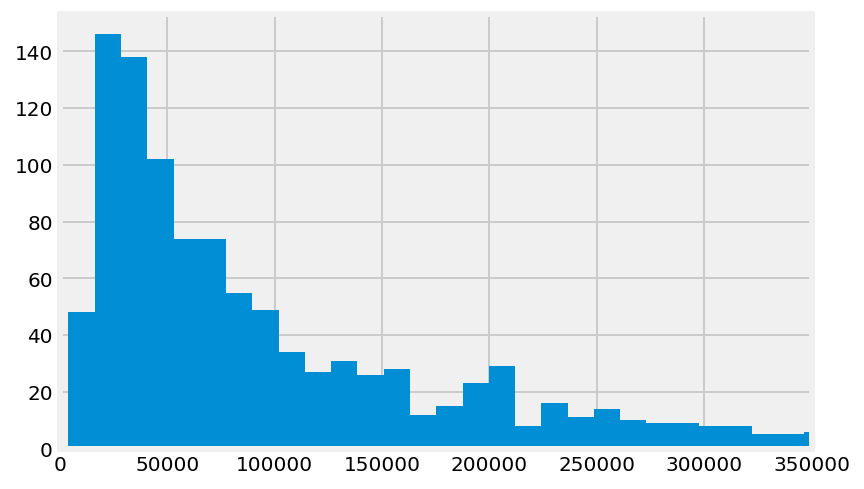

Store_Number
2106    1433451.46
2113      85763.42
2130    1107685.25
2152      72080.36
2178     277987.96
2190    1226205.17
2191    1275405.26
2200     223899.24
2228     188879.70
2233     316855.05
2238     105057.79
2248     659252.26
2285     776397.91
2290     549295.90
2327     100596.80
2353     485145.13
2413     835742.87
2445      71682.86
2448     203038.62
2459      79026.65
2465     264728.41
2475     121763.29
2478     198550.40
2498      27453.07
2500    1354990.08
2501    1377465.13
2502    1372155.78
2505     659068.44
2506    1426370.36
2507     299207.06
           ...    
5090      31888.65
5091      30876.44
5092      51100.71
5094      14327.23
5096      71490.84
5097     123882.25
5098     100442.05
5099      20721.55
5100     109536.24
5101      88825.14
5102    1951393.22
5103      12924.97
5104     100995.41
5105     482906.49
5106     241120.84
5108      60238.69
5112      38465.05
5113     108094.57
5114       9555.45
5115      24917.04
5116     128662.55

In [331]:

 
y = df_2015_group['Sale'] #*12
plt.hist(y, bins=800)
plt.xlim(0,350000)
plt.show()
y

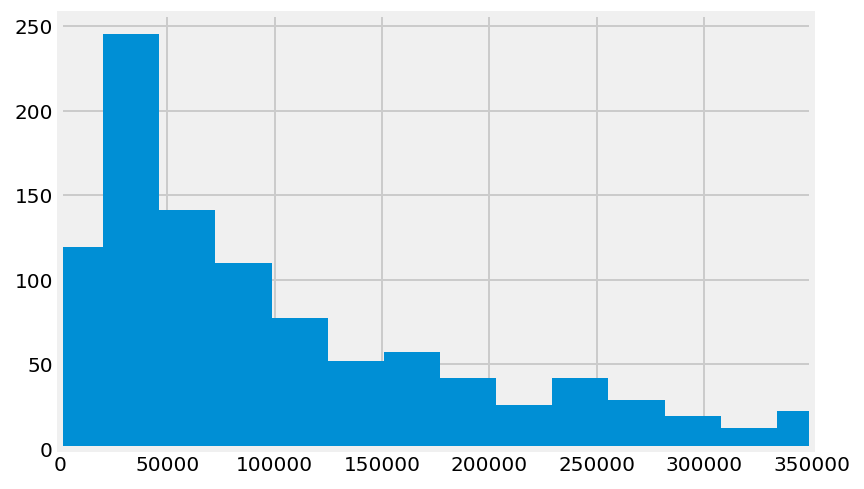

In [332]:
y = predictions_2016


plt.hist(y, bins=500)

plt.xlim(0,350000)
plt.show()

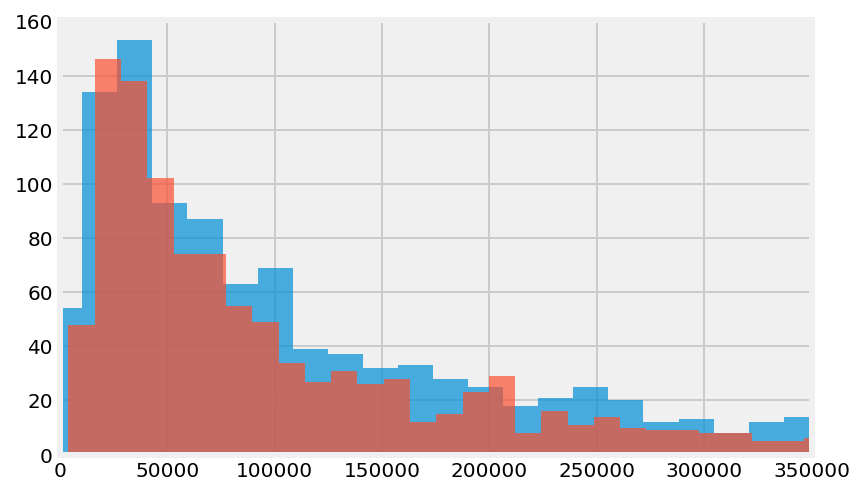

In [335]:
y1 = predictions_2016
y2 = df_2015_group['Sale']

plt.hist(y1, bins=800, alpha=.7)
plt.hist(y2, bins=800, alpha=.7)
plt.xlim(0,350000)
plt.show()

In [97]:
len(y1)

1290

In [98]:
len(y2)

1281

In [310]:
# MODEL 2 EXTRACTING UNNECESSARY VARIABLES 
X2 = df_2015_group[['Bottle_Volume', 'Bottles_Sold', 'Sale_f3m']]
y2 = df_2015_group['Sale'] *12 

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=77777)

In [312]:
slr = LinearRegression()

In [313]:
cross_val_score(slr,X_train,y_train)

array([ 0.99079692,  0.98802195,  0.98721696])

In [314]:
print(np.mean(cross_val_score(slr,X2,y2)))
print(np.std(cross_val_score(slr,X2,y2)))

0.979421936187
0.0127838312991


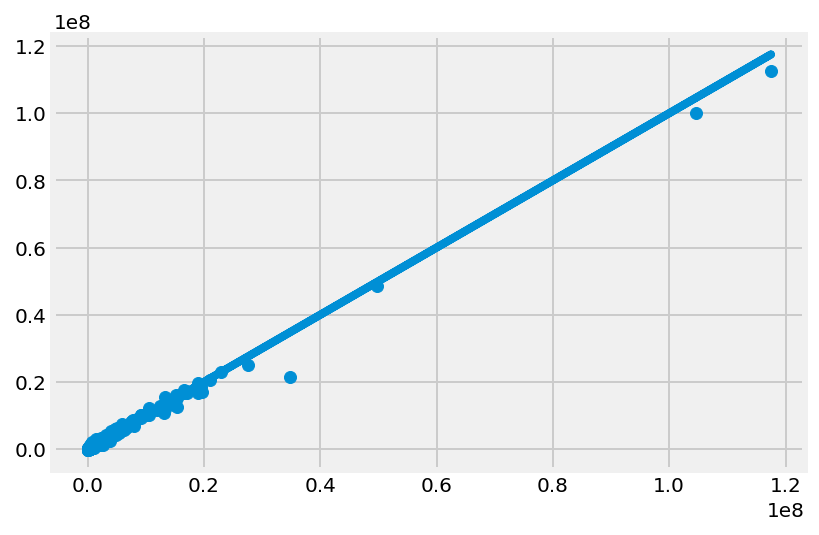

0.99010295082444366

In [110]:
slr.fit(X_train,y_train)
predictions = slr.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.show()
slr.score(X_test,y_test)

In [ ]:
# I DO NOT HAVE TO TAKE OUT VARIABLES FROM FIRST MODEL AS IT IS RUNNING FINE WITH ALL IT'S VARIABLES SO I WILL USE MODEL 1

In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [316]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02])

In [317]:
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True)#, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [318]:
ridgeregcv.score(X_test,y_test)

0.98946565102493678

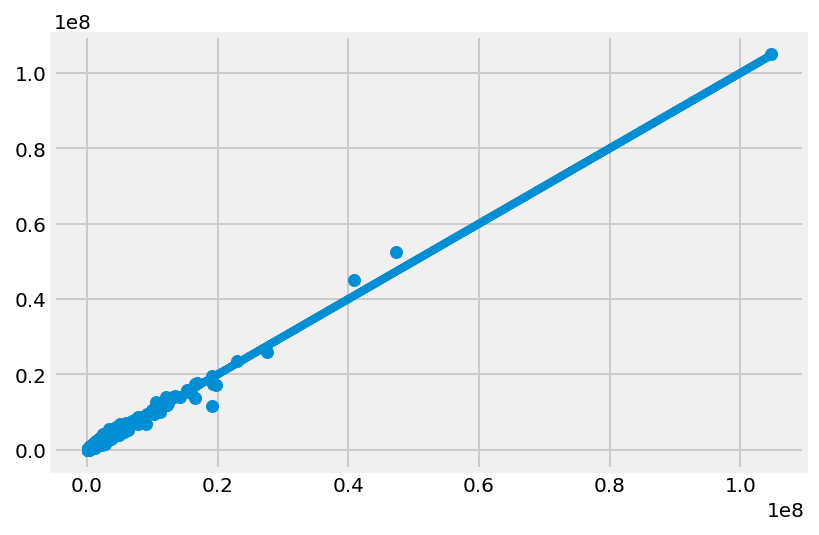

0.98946565102493678

In [319]:
predictions = ridgeregcv.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.show()
ridgeregcv.score(X_test,y_test)

import statsmodels.api as sm


X = df_2015_group[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Store_Number', 'Bottles_Sold', 'Sale_f3m']].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = df_2015_group['Sale'] *12


model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)
model.summary()

In [ ]:
#df_2015_group = df_2015_group.reset_index()

In [ ]:
df_2015_group = df_2015_group.dropna()
df_2015_group

import statsmodels.api as sm


X = df_2015_group[['State_Bottle_Cost','Bottle_Volume', 'Bottles_Sold', 'Sale_f3m']].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = df_2015_group['Sale'] *12

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)
model.summary()

In [ ]:
predictions

In [ ]:
#df_2016_group = df_2016_group.reset_index()

import statsmodels.api as sm


X = df_2016_group[['State_Bottle_Cost', 'State_Bottle_Retail',
                         'Bottle_Volume', 'Bottles_Sold', 'Sale_f3m']].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = df_2016_group['Sale'] *12


model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)
model.summary()

In [ ]:
predictions

import statsmodels.api as sm


X1 = df_2016_group[['Bottle_Volume', 'Store_Number', 'Bottles_Sold', 'Sale_f3m']].values
X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y1 = df_2016_group['Sale'] *12


model = sm.OLS(y1, X1)
model = model.fit()
predictions = model.predict(X1)
model.summary()

import statsmodels.api as sm


X1 = df_2016_group[['Bottle_Volume', 'Store_Number', 'Bottles_Sold', 'Sale_f3m']].values
X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y1 = df_2016_group['Sale'] *12

model = sm.OLS(y1, X1)
model = model.fit()
predictions = model.predict(X1)
model.summary()

In [ ]:
predictions

# Plot your results


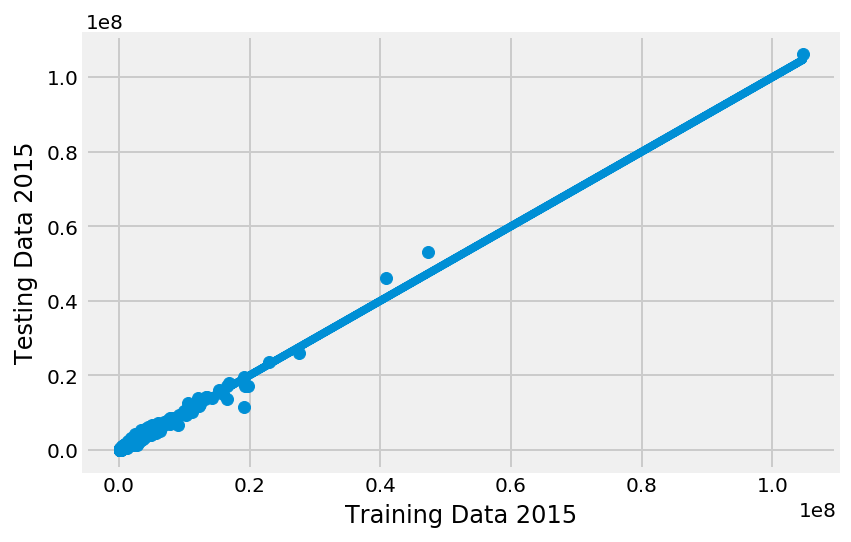

0.98871316667988796

In [336]:
# Linear Regression number 1 for 2015
slr.fit(X_train,y_train)
predictions = slr.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.xlabel('Training Data 2015')
plt.ylabel('Testing Data 2015')
plt.show()
slr.score(X_test,y_test)

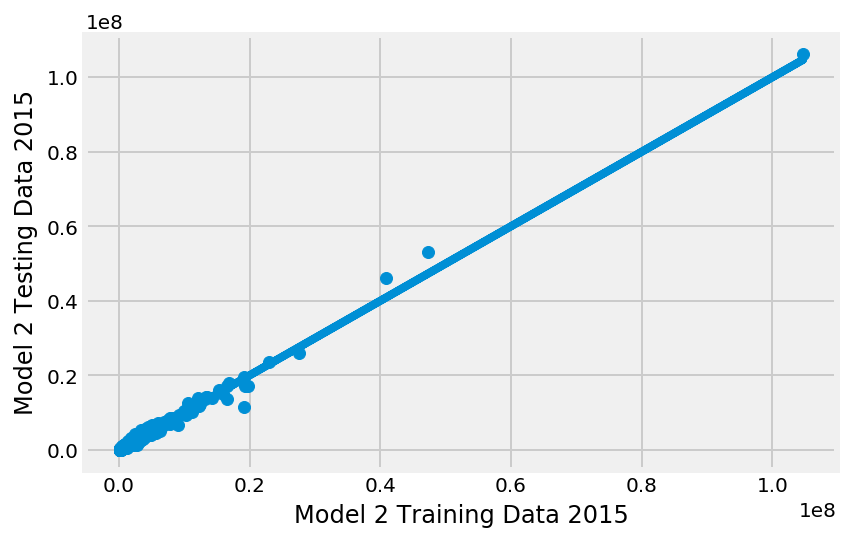

0.98871316667988796

In [337]:
# Linear Regression number 2 for 2015
slr.fit(X_train,y_train)
predictions = slr.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.xlabel('Model 2 Training Data 2015')
plt.ylabel('Model 2 Testing Data 2015')
plt.show()
slr.score(X_test,y_test)

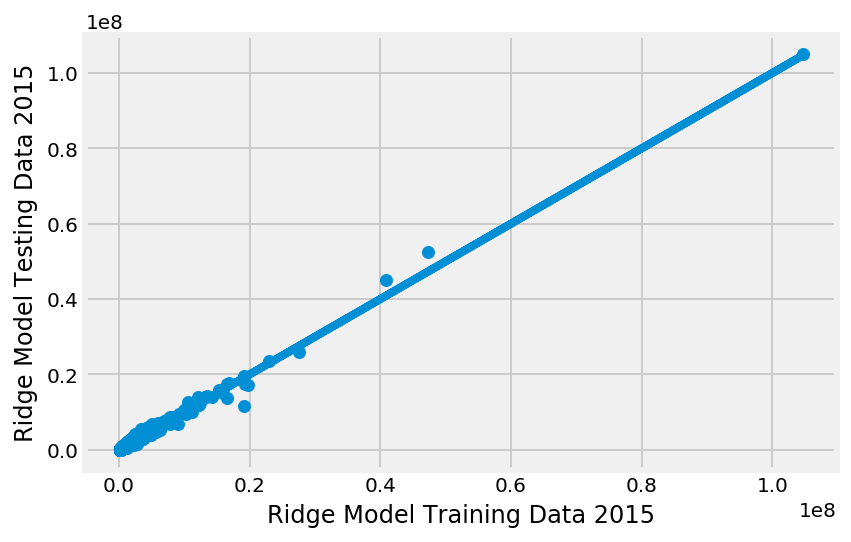

0.98946565102493678

In [338]:
#Ridge Regression for 2015
predictions = ridgeregcv.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test)
plt.xlabel('Ridge Model Training Data 2015')
plt.ylabel('Ridge Model Testing Data 2015')
plt.show()
ridgeregcv.score(X_test,y_test)

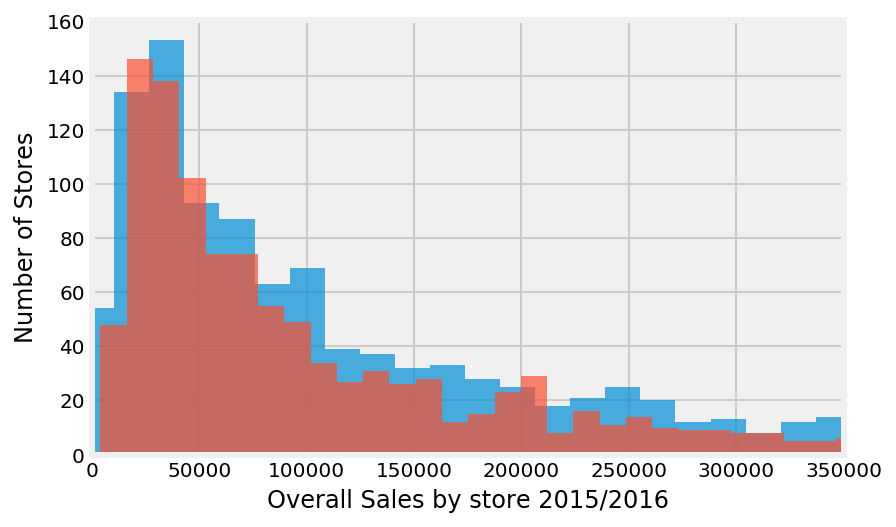

In [339]:
y1 = predictions_2016
y2 = df_2015_group['Sale']

plt.hist(y1, bins=800, alpha=.7)
plt.hist(y2, bins=800, alpha=.7)
plt.xlim(0,350000)
plt.xlabel('Overall Sales by store 2015/2016')
plt.ylabel('Number of Stores')
plt.show()

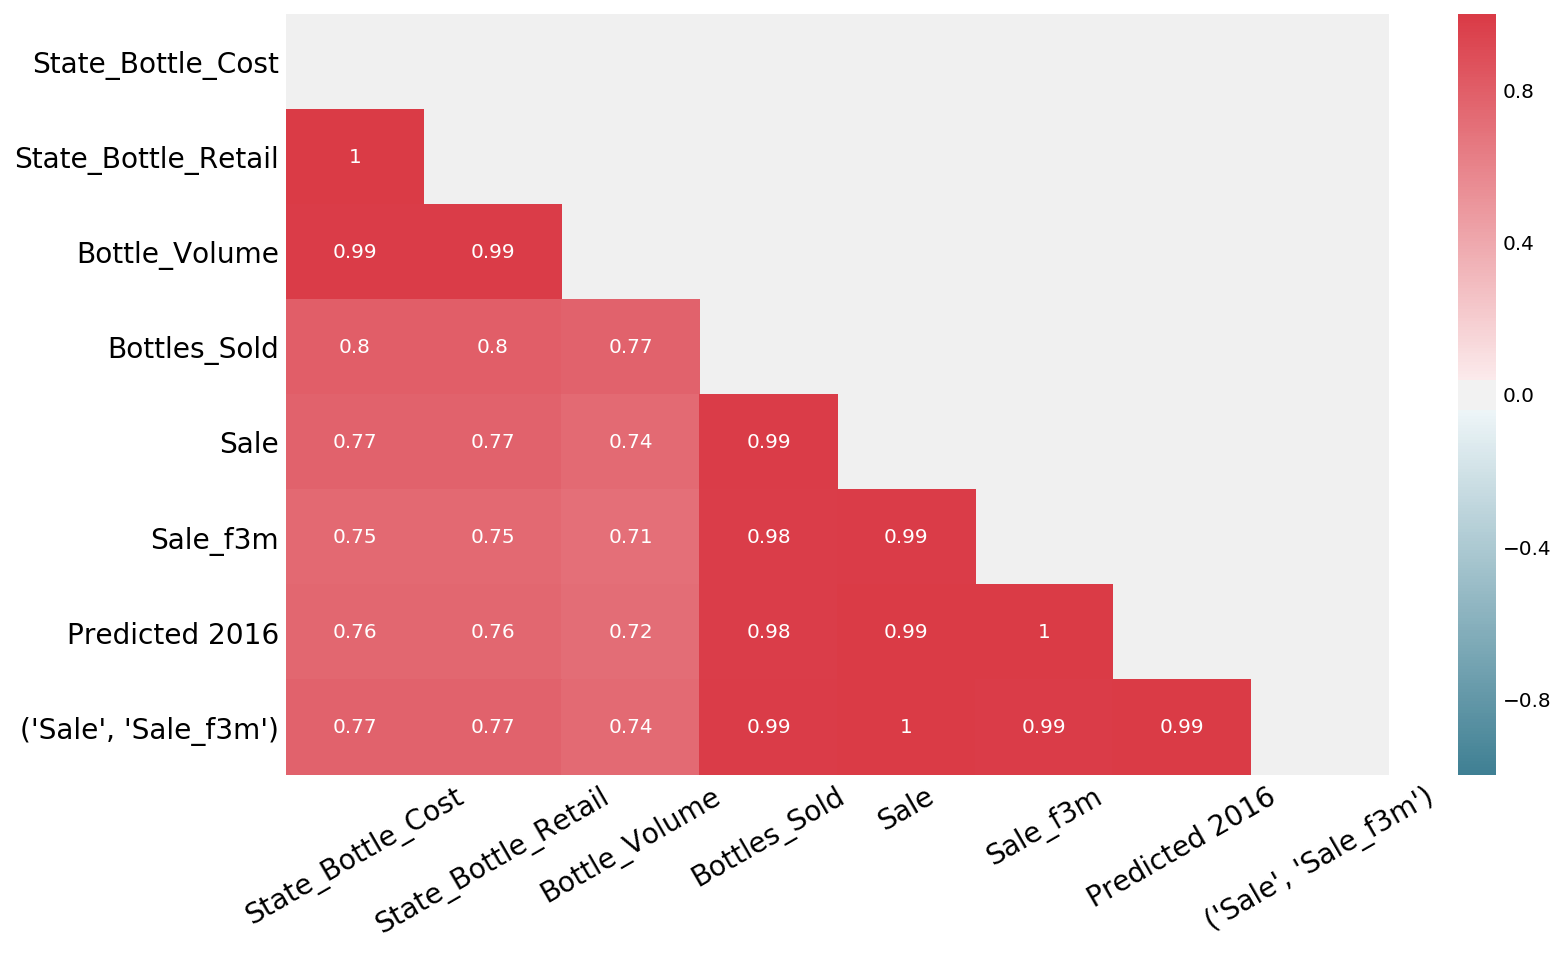

In [368]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df_2015_group.copy()
df_2015_group = y
correlation_heat_map(df_with_target)

In [ ]:
# We see data is highly correlated

# Results



After running 2 Linear Regression models in Sklearn with different features and then standardizing and running a Ridge Regularization model, I have concluded that I can account for over 98% of the variance in the data for sales in 2015. This may be due to a high correlation between variables in the dataframe, however I tried to compensate by running a second linear regression which produced very similar results in terms of r score to the first as well as regularizing with a Ridge Model that produced almost identical results as well. It is with this model that I predicted annual 2016 liquor sales and appended it to the 2015 dataframe to compare sales and see if there is indeed any increase to report to Iowa State Tax Board. I found that sales were predicted to go up by 19%.